In [1274]:
#Importar librerías 
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from numpy import fft
import scipy.stats as stats
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [1275]:
#Descargar datos de Yahoo! finance
#Tickers
tickers = ['ELEKTRA.MX','BIMBOA.MX','^MXX','KO','JNJ','^DJI']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-11-26'
end_date = '2019-11-25'

In [1276]:
# Usar el pandas data reader. El comando sort_index ordena los datos por fechas
financial_assets = (web.DataReader(tickers,data_source, 
                                   start_date, end_date,pause=0.01)
                    ['Adj Close']
                    .fillna(method = 'ffill'))
financial_assets.head(10)

Symbols,ELEKTRA.MX,BIMBOA.MX,^MXX,KO,JNJ,^DJI
Date,,,,,,
2014-11-26,561.238831,38.002975,44672.199219,37.910255,93.456810,17827.750000
2014-11-27,564.248535,38.090340,44689.210938,37.910255,93.456810,17827.750000
2014-11-28,568.235535,37.964149,44190.468750,38.372463,94.363411,17828.240234
2014-12-01,558.335693,37.517628,43392.070312,38.132793,94.171638,17776.800781
2014-12-02,550.361511,37.071102,43008.070312,38.124241,94.590057,17879.550781
2014-12-03,557.222717,37.080811,43112.289062,37.490826,93.901413,17912.619141
2014-12-04,559.864746,36.702232,42816.148438,37.234043,93.761917,17900.099609
2014-12-05,556.535706,36.614872,43230.339844,37.259720,94.590057,17958.789062
2014-12-08,549.867920,36.537216,42941.828125,36.925896,94.598778,17852.480469


In [1277]:
USD = 19.479 #25 noviembre 2019
#Conversión a mismas unidades monetarias
financial_assets = (
financial_assets
    .assign(
    KO = lambda x : x['KO'] * USD,
    JNJ = lambda y : y['JNJ'] * USD,
    DJI = lambda z : z['^DJI'] * USD
    )
).drop(columns=['^DJI']).rename(columns={'DJI':'^DJI'})

financial_assets.head(3)

Symbols,ELEKTRA.MX,BIMBOA.MX,^MXX,KO,JNJ,^DJI
Date,,,,,,
2014-11-26,561.238831,38.002975,44672.199219,738.453866,1820.445202,347266.742250
2014-11-27,564.248535,38.090340,44689.210938,738.453866,1820.445202,347266.742250
2014-11-28,568.235535,37.964149,44190.468750,747.457211,1838.104882,347276.291525


In [1278]:
#copia del dataframe 
df = financial_assets.copy()

In [1279]:
companie = '^MXX'

In [1280]:
financial_assets = df[companie].reset_index()

In [1281]:
financial_assets

,Date,^MXX
0,2014-11-26,44672.199219
1,2014-11-27,44689.210938
2,2014-11-28,44190.468750
3,2014-12-01,43392.070312
4,2014-12-02,43008.070312
...,...,...
1287,2019-11-20,43604.699219
1288,2019-11-21,43255.429688
1289,2019-11-22,43521.859375
1290,2019-11-25,43535.109375


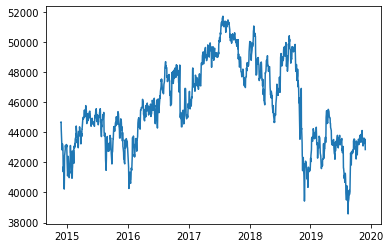

In [1282]:
plt.plot(financial_assets.Date,financial_assets[companie])
plt.show()

In [1283]:
returns = financial_assets[companie].pct_change().dropna()
returns.head(5)

1    0.000381
2   -0.011160
3   -0.018067
4   -0.008850
5    0.002423
Name: ^MXX, dtype: float64

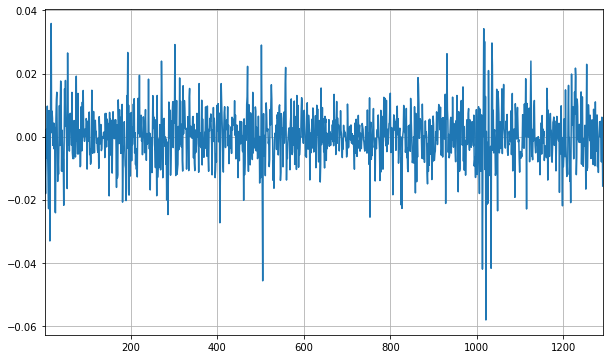

In [1284]:
plt.figure(figsize=(15,10))
(financial_assets[companie]
.pct_change()
.dropna()
.plot(figsize=(10,6)))
plt.grid()

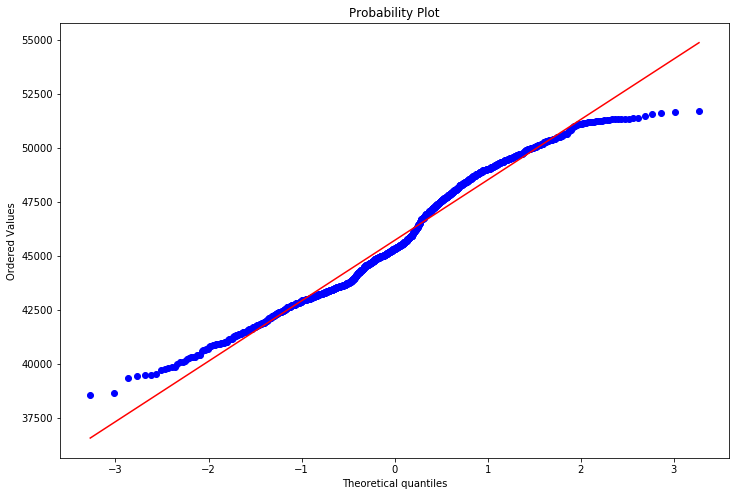

In [1285]:
#Grafico de probabilidad
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(financial_assets[companie], dist='norm', plot=ax);

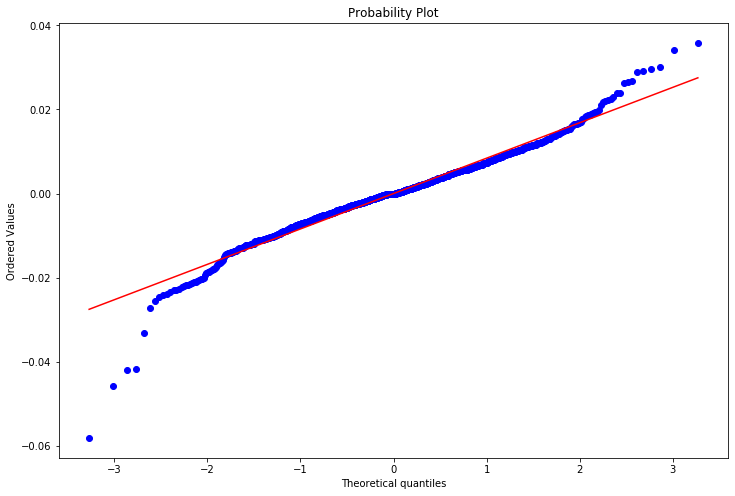

In [1286]:
#Grafico de probabilidad
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(returns, dist='norm', plot=ax);

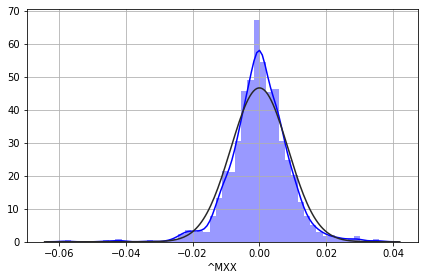

In [1287]:
# Histograma de los rendimientos
sns.distplot(returns, color="b", fit=stats.norm, norm_hist=True)
plt.tight_layout()
plt.grid()
plt.show()

> ## Proceso estocástico de Montecarlo

In [1288]:
#Statistics 
mu , sigma = ( returns.mean(), 
              returns.std() )  

#Current stock price
So = financial_assets[companie].iloc[-1:].values[0]

#Random values
random_values = np.random.normal(0, 1, 1000)

#frequency of time
dt = 1/252

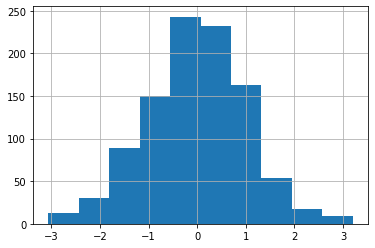

In [1289]:
#Random values histogram
plt.hist(random_values)
plt.grid()
plt.show()

In [1290]:
#Monte Carlos stochastic logratihm process
sp_MonteCarlo = So*np.exp((mu-0.5*sigma**2)*dt + sigma*random_values*np.sqrt(dt))

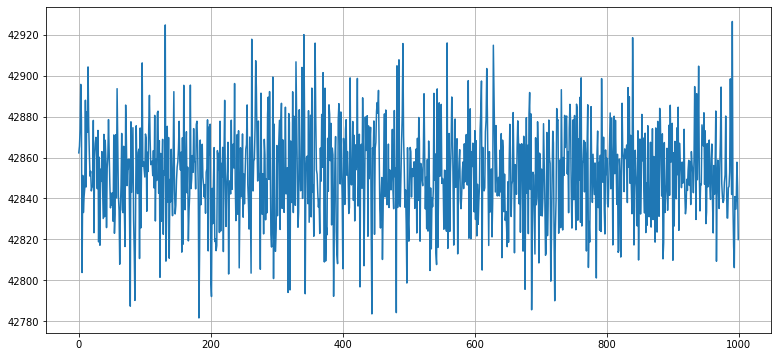

In [1291]:
#Monte Carlo stochastic process
plt.figure(figsize=(13,6))
plt.plot(sp_MonteCarlo)
plt.grid()
plt.show()

In [1292]:
date = np.datetime64('2019-11-27T00:00:00.000000000')

In [1293]:
series_values = financial_assets[companie][-50:].mean()

In [1294]:
#Error en diferencia grado 1
vf_sp = sp_MonteCarlo.mean()
rmse_sp = np.sqrt(np.mean((financial_assets[companie][-1:].values[0] - vf_sp)**2))

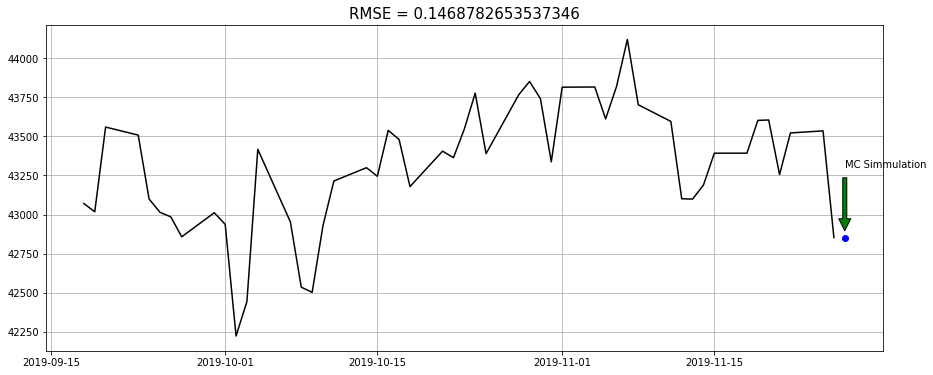

In [1295]:
plt.figure(figsize=(15,6))
plt.plot(financial_assets['Date'][-50:],financial_assets[companie][-50:],'k',date,sp_MonteCarlo.mean(),'ob')
plt.annotate('MC Simmulation', xy=(date, sp_MonteCarlo.mean()), xytext=(date, series_values),
             arrowprops=dict(facecolor='green', shrink=0.1),
             )

plt.grid()
plt.title('RMSE = ' + str(rmse_sp), fontsize=15);
plt.show()

In [1296]:
#Varias simulaciones
ndias = 10
nesc = 6
simm = pd.DataFrame(So*np.exp((mu-0.5*sigma**2)*dt + sigma*np.random.randn(ndias,nesc)*np.sqrt(dt)),
             index=np.arange(financial_assets.index[-1]+1,financial_assets.index[-1]+1+ndias))

simm.head()

,0,1,2,3,4,5
1292,42853.388579,42834.633590,42841.111720,42848.429697,42851.884760,42865.644908
1293,42859.820603,42911.418812,42844.156116,42893.175900,42783.013685,42806.943974
1294,42853.715505,42836.799239,42898.299458,42803.148166,42879.973645,42859.653825
1295,42841.141015,42852.127689,42844.830174,42887.808968,42865.889808,42856.076281
1296,42821.977154,42851.199333,42840.094197,42828.140043,42850.897074,42877.944513


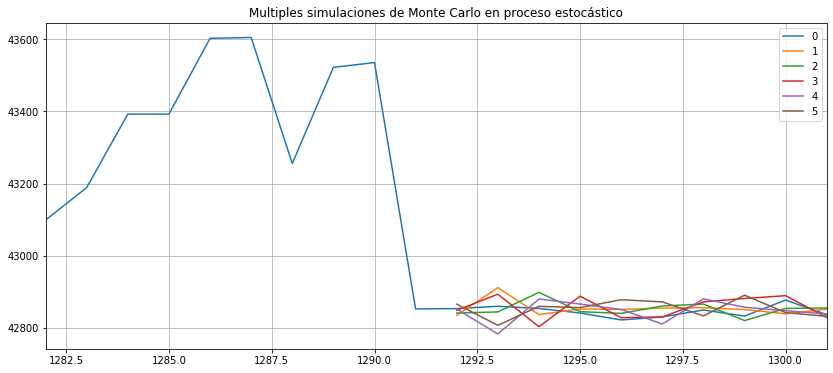

In [1297]:
#Juntar las simulaciones
pd.concat([financial_assets[companie].iloc[-10:],simm]).plot(figsize=(14,6));
plt.grid()
plt.title("Multiples simulaciones de Monte Carlo en proceso estocástico")
plt.show()
#sim_closes_normal.plot(figsize=(8,6),label=False);

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


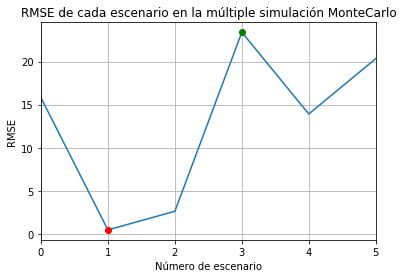

In [1298]:
rmse_msp = np.sqrt(np.mean((financial_assets[companie][-1:].values[0] - simm[-1:])**2))
rmse_msp.plot(grid=True)
plt.plot(np.argmin(rmse_msp),min(rmse_msp),'ro')
plt.plot(np.argmax(rmse_msp),max(rmse_msp),'go')
plt.title("RMSE de cada escenario en la múltiple simulación MonteCarlo")
plt.xlabel("Número de escenario")
plt.ylabel("RMSE")
plt.show()

In [1299]:
#RMSE
rmse_min = rmse_msp[np.argmin(rmse_msp)]
rmse_max = rmse_msp[np.argmax(rmse_msp)]
rmse_max

23.394591102798586

In [1300]:
#Valor que tiene el menor RMSE
vf_msp = simm[-1:][np.argmin(rmse_msp)].values[0]
vf_max = simm[-1:][np.argmax(rmse_msp)].values[0]
vf_max

42828.9647838972

> ## Transformada rápida de Fourier (FFT)

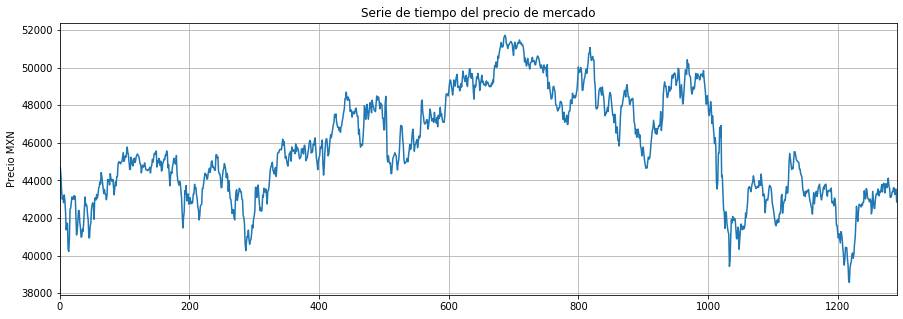

In [1301]:
plt.figure(figsize=(15,5))
financial_assets[companie].plot(grid=True)
plt.ylabel('Precio MXN')
plt.title('Serie de tiempo del precio de mercado');

In [1302]:
#np.append(np.array([0]),np.diff(financial_assets[companie].values))

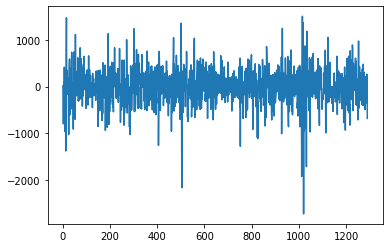

In [1303]:
plt.plot(np.diff(financial_assets[companie].values))
plt.show()

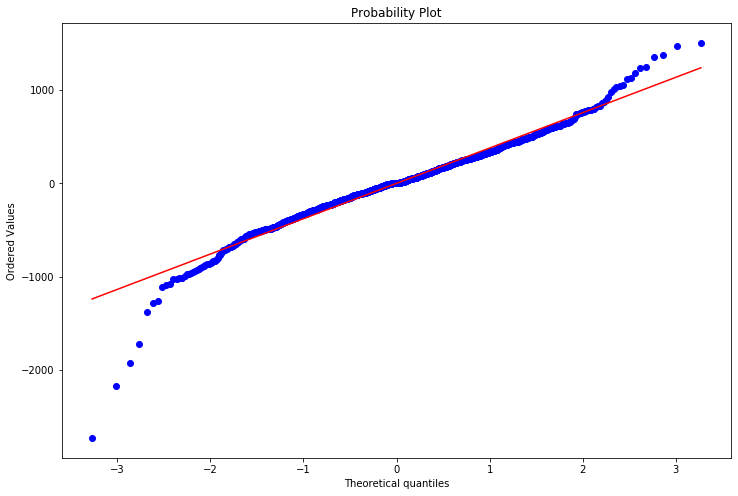

In [1304]:
#Grafico de probabilidad
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(np.diff(financial_assets[companie].values), dist='norm', plot=ax);

In [1305]:
#Diferencias de grado 1 entre los valores
financial_assets['delta'] = np.append(np.array([0]),np.diff(financial_assets[companie].values))
financial_assets

,Date,^MXX,delta
0,2014-11-26,44672.199219,0.000000
1,2014-11-27,44689.210938,17.011719
2,2014-11-28,44190.468750,-498.742188
3,2014-12-01,43392.070312,-798.398438
4,2014-12-02,43008.070312,-384.000000
...,...,...,...
1287,2019-11-20,43604.699219,2.449219
1288,2019-11-21,43255.429688,-349.269531
1289,2019-11-22,43521.859375,266.429688
1290,2019-11-25,43535.109375,13.250000


In [1307]:
sp = fft.fft(financial_assets['delta'])
sp[:10]

array([ -1819.83984375    +0.j        ,  -4315.44385852 -9883.93868889j,
         3898.23718305 +1838.50283996j,   1751.22119284  +777.70613235j,
         4691.11242074 +1458.43136048j, -13176.52478984 -9757.14859406j,
          388.90923903 -3784.27461701j,   7047.84982123 -1521.90713143j,
        -1709.32767881+15862.20012367j, -18316.36045717 +8832.19203356j])

In [1308]:
financial_assets['theta'] = np.arctan(sp.imag/sp.real)
numValues = len(financial_assets) - 4
numValuesHalf = numValues / 2
financial_assets['amplitude'] = np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
financial_assets['freq'] = np.fft.fftfreq(sp.size, d=1)
financial_assets.head()

,Date,^MXX,delta,theta,amplitude,freq
0,2014-11-26,44672.199219,0.000000,-0.000000,2.825838,0.000000
1,2014-11-27,44689.210938,17.011719,1.159132,16.746828,0.000774
2,2014-11-28,44190.468750,-498.742188,0.440690,6.692591,0.001548
3,2014-12-01,43392.070312,-798.398438,0.417931,2.975377,0.002322
4,2014-12-02,43008.070312,-384.000000,0.301420,7.628248,0.003096


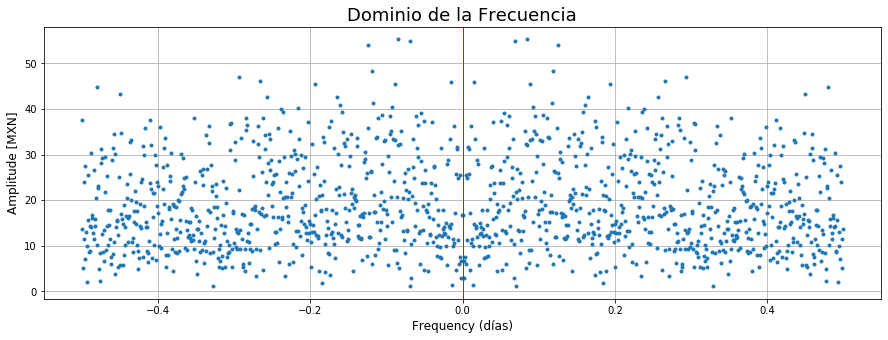

In [1309]:
plt.figure(figsize=(15,5))
plt.plot(financial_assets['freq'],financial_assets['amplitude'], '.')
plt.axvline(x=0, ymin=0, ymax = 1, linewidth=1, color='r')
plt.ylabel('Amplitude [MXN]', fontsize=12)
plt.xlabel('Frequency (días)', fontsize=12)
plt.title('Dominio de la Frecuencia', fontsize=18)
plt.grid()

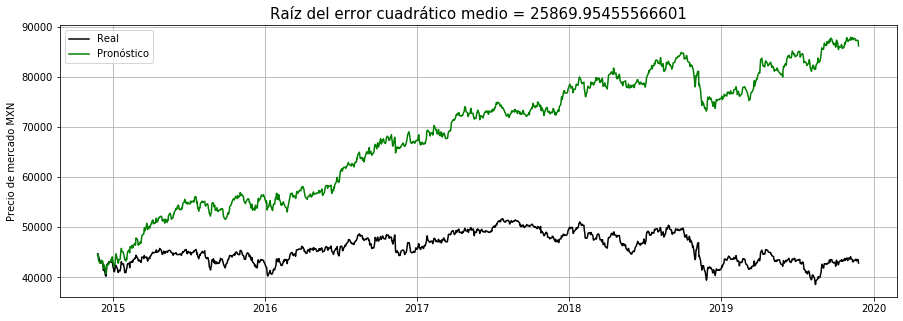

In [1310]:
regressionDelta = 0

for n in range(len(dominantTheta)):
    shift = dominantTheta[n]
    regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(financial_assets))) + shift)
    
#Converting Delta Time to Time at start value of real data    
startValue = financial_assets[companie]
regression = startValue + np.cumsum(regressionDelta)

plt.figure(figsize=(15,5))
plt.plot(financial_assets.Date,financial_assets[companie],'k',financial_assets.Date,regression,'g')
plt.ylabel('Precio de mercado MXN')
plt.legend(['Real','Pronóstico']);

rmse = np.sqrt(np.mean((financial_assets[companie] - regression)**2))

plt.grid()
plt.title('Raíz del error cuadrático medio = ' + str(rmse) , fontsize=15);

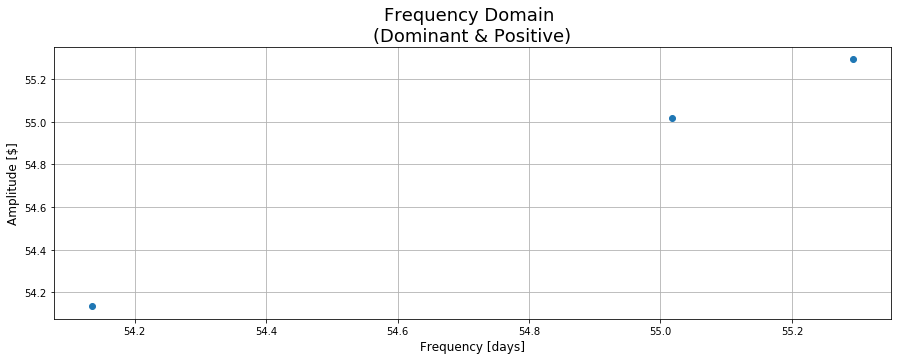

In [1311]:
meanAmp = financial_assets['amplitude'].mean()
stdAmp = financial_assets['amplitude'].std()
dominantAmpCheck = financial_assets['amplitude'] > (3*stdAmp + meanAmp) 
positiveFreqCheck = financial_assets['freq'] > 0
dominantAmp = (financial_assets['amplitude'][dominantAmpCheck & positiveFreqCheck]).reset_index(drop=True)
dominantFreq = (financial_assets['amplitude'][dominantAmpCheck & positiveFreqCheck]).reset_index(drop=True)
dominantTheta = (financial_assets['amplitude'][dominantAmpCheck & positiveFreqCheck]).reset_index(drop=True)

plt.figure(figsize=(15,5))
plt.plot(dominantFreq, dominantAmp, 'o')
plt.ylabel('Amplitude [$]', fontsize=12)
plt.xlabel('Frequency [days]', fontsize=12)
plt.title('Frequency Domain \n(Dominant & Positive)', fontsize=18)
plt.grid()

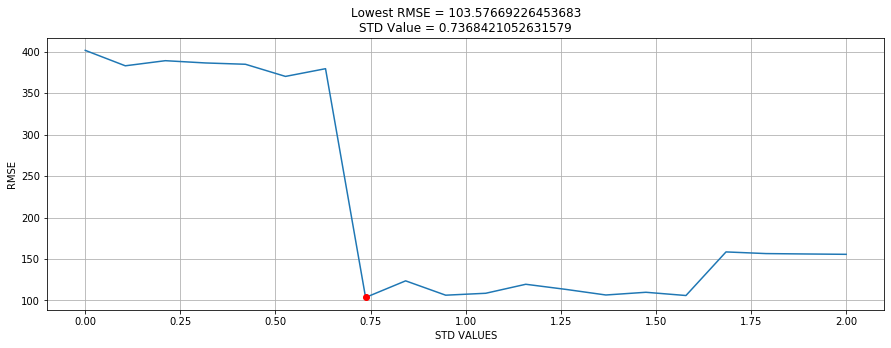

In [1312]:
idx = np.array(rmse_values).argmin()
minSTD = std_values[idx]
minRMSE = rmse_values[idx]

plt.figure(figsize=(15,5))
plt.plot(std_values, rmse_values)
plt.plot(minSTD, minRMSE, 'ro')
plt.ylabel('RMSE')
plt.xlabel('STD VALUES')
plt.title('Lowest RMSE = '+str(minRMSE)+'\nSTD Value = '+str(minSTD))
plt.grid()

In [1313]:
financial_assets.columns

Index(['Date', '^MXX', 'delta', 'theta', 'amplitude', 'freq'], dtype='object')

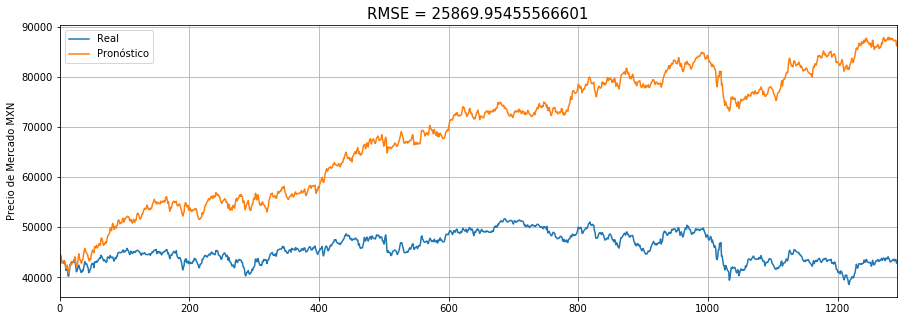

In [1314]:
#Getting dominant values based on std_value
meanAmp = financial_assets['amplitude'].mean()
stdAmp = financial_assets['amplitude'].std()
dominantAmpCheck = financial_assets['amplitude'] > (minSTD*stdAmp + meanAmp) 
positiveFreqCheck = financial_assets['freq'] > 0
dominantAmp = (financial_assets['amplitude'][dominantAmpCheck & positiveFreqCheck]).reset_index(drop=True)
dominantFreq = (financial_assets['amplitude'][dominantAmpCheck & positiveFreqCheck]).reset_index(drop=True)
dominantTheta = (financial_assets['amplitude'][dominantAmpCheck & positiveFreqCheck]).reset_index(drop=True)

#Calculating Regression Delta
regressionDelta = 0
for n in range(len(dominantTheta)):
    shift = dominantTheta[n]
    regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(df))) + shift)

#Converting Delta Time to Time at start value of real data    
startValue = financial_assets[companie]
regression = startValue + np.cumsum(regressionDelta)

plt.figure(figsize=(15,5))
financial_assets[companie].plot(grid=True)
plt.plot(regression)
plt.ylabel('Precio de Mercado MXN')
plt.legend(['Real','Pronóstico']);

rmse = np.sqrt(np.mean((financial_assets[companie].values - regression)**2))

plt.title('RMSE = ' + str(rmse), fontsize=15);

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Francisco Javier Enríquez Muñoz.
</footer>

In [1315]:
#Random values
random_dominantTheta = np.random.uniform(dominantTheta.min(),dominantTheta.max(),1)
random_dominantAmp = np.random.uniform(dominantAmp.min(),dominantAmp.max(),1)

In [1316]:
long = len(random_dominantTheta)

In [1317]:
#Calculating Forecast
regressionDelta_r = 0
for k in range(len(random_dominantTheta)):
    shift_r = random_dominantTheta[k]
    regressionDelta_r += random_dominantAmp[k] * np.cos(k * np.array(range(long) + shift_r))

#Converting Delta Time to Time at start value of real data    
Value = financial_assets[companie][-long:].values
regression_r = Value + np.cumsum(regressionDelta_r)

In [1318]:
#Valor pronosticado en Análisis espectral
vf_spa = regression_r[0]
vf_spa

42881.98525921803

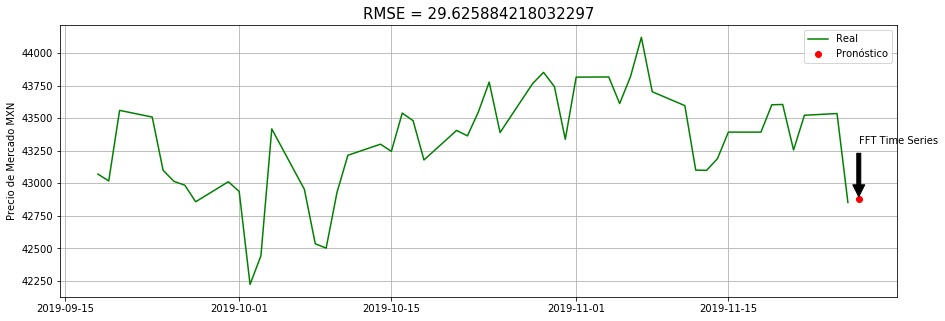

In [1319]:
plt.figure(figsize=(15,5))
plt.plot(financial_assets.Date[-50:],financial_assets[companie][-50:],'g',
         date,regression_r,'or')
plt.ylabel('Precio de Mercado MXN')
plt.legend(['Real','Pronóstico']);
plt.annotate('FFT Time Series', xy=(date, sp_MonteCarlo.mean()), xytext=(date, series_values),
             arrowprops=dict(facecolor='black', shrink=0.1),
             )
rmse_spa = np.sqrt(np.mean((financial_assets[companie][-1:] - vf_spa)**2))
plt.grid()
plt.title('RMSE = ' + str(rmse_spa), fontsize=15);

In [1320]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [1321]:
#Cntidad de rezagos en la red neuronal que se quieren
PASOS = 3

# load dataset
values = financial_assets[companie].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head(10)

,var1(t-3),var1(t-2),var1(t-1),var1(t)
3,-0.071783,-0.069193,-0.145110,-0.266639
4,-0.069193,-0.145110,-0.266639,-0.325090
5,-0.145110,-0.266639,-0.325090,-0.309226
6,-0.266639,-0.325090,-0.309226,-0.354303
7,-0.325090,-0.309226,-0.354303,-0.291257
8,-0.309226,-0.354303,-0.291257,-0.335173
9,-0.354303,-0.291257,-0.335173,-0.426837
10,-0.291257,-0.335173,-0.426837,-0.574026
11,-0.335173,-0.426837,-0.574026,-0.521982
12,-0.426837,-0.574026,-0.521982,-0.521982


In [1322]:
len(financial_assets[companie])

1292

In [1323]:
#Número de días de entranamiento
train_days = int(np.ceil(len(financial_assets[companie])*0.80) )
train_days

1034

In [1324]:
#Días de validación
len(financial_assets)-train_days

258

In [1325]:
# split into train and test sets
values = reframed.values
train = values[:train_days, :]
test = values[train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(1034, 1, 3) (1034,) (255, 1, 3) (255,)


In [1326]:
#Creación de la función del modelo neuronal
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [1327]:
EPOCHS=40

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS) #ir reduciendo el error

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1, 3)              12        
_________________________________________________________________
flatten_3 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Train on 1034 samples, validate on 255 samples
Epoch 1/40
1034/1034 [==============================] - 1s 1ms/step - loss: 0.1624 - mse: 0.0611 - val_loss: 0.0673 - val_mse: 0.0075
Epoch 2/40
1034/1034 [==============================] - 1s 853us/step - loss: 0.0771 - mse: 0.0102 - val_loss: 0.0633 - val_mse: 0.0065
Epoch 3/40
1034/1034 [==============================] - 1s 714us/step -

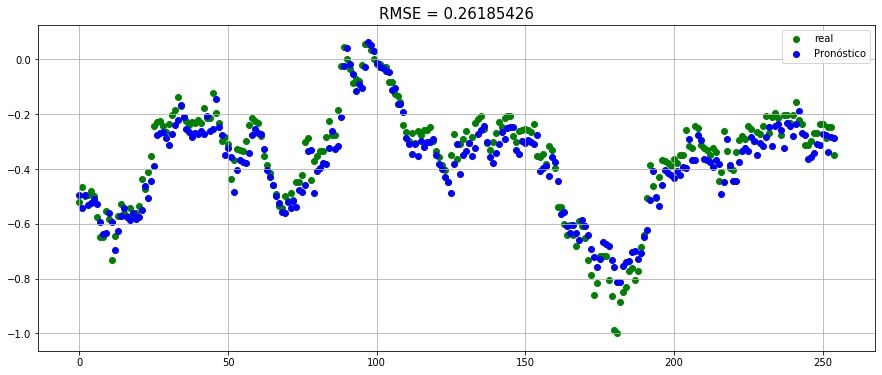

In [1328]:
results=model.predict(x_val)
rmse_nn = np.sqrt(np.mean((y_val - results)**2))

plt.figure(figsize=(15,6))
plt.scatter(range(len(y_val)),y_val,c='g', label='real')
plt.scatter(range(len(results)),results,c='b', label='Pronóstico')
plt.title('RMSE = ' + str(rmse_nn), fontsize=15);
plt.grid()
plt.legend(loc='best')
plt.show()

In [1329]:
#Predicción
valores = financial_assets[companie][-14:].values
# normalize features
valores=valores.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(valores)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[3]], axis=1, inplace=True)
reframed

,var1(t-3),var1(t-2),var1(t-1)
3,1.000000,0.340978,0.172733
4,0.340978,0.172733,-0.608043
5,0.172733,-0.608043,-0.611372
6,-0.608043,-0.611372,-0.469315
7,-0.611372,-0.469315,-0.147955
8,-0.469315,-0.147955,-0.147955
9,-0.147955,-0.147955,0.183223
10,-0.147955,0.183223,0.187087
11,0.183223,0.187087,-0.364011
12,0.187087,-0.364011,0.056378


In [1330]:
valores = reframed.values
x_test = valores[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [1331]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(100):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    x_test=agregarNuevoValor(x_test,parcial[0])

In [1332]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)

In [1333]:
vf_nn = inverted[0][0]
rsme_nn = np.sqrt(np.mean((So - vf_nn)**2))

> ## Comparación de resultados

In [1334]:
data = {'Método' : ['Monte Carlo Simple', 'Mínimo MC múltiple', 'Máximo MC múltiple', 'FFT LR', 'Perceptrón','Valor presente'],
        'RMSE': [rmse_sp,rmse_min, rmse_max, rmse_spa,rmse_nn,0], 
        'pronóstico': [vf_sp, vf_msp, vf_max, vf_spa, vf_nn,So]}

pd.DataFrame.from_dict(data)

,Método,RMSE,pronóstico
0,Monte Carlo Simple,0.146878,42852.212497
1,Mínimo MC múltiple,0.466695,42851.892680
2,Máximo MC múltiple,23.394591,42828.964784
3,FFT LR,29.625884,42881.985259
4,Perceptrón,0.261854,43634.013951
5,Valor presente,0.000000,42852.359375
